## Regularization

In [2]:
# Overfitting: 1000 training images, 
#              400 epochs, 
#              30 hidden neurons
#              mini-batche size of 10,
#              0.5 learining rate
#              cross-entropy cost function
#              
#              λ = 0.1 regularization parameter (as lmbda)
#              
# Test data is used (rather than validation) to compare wuth the 
# earlier graphs.
# Plot graphs to illustrate the problem of overfitting.  

import time
import json
import random
import sys
sys.path.append('../src/')

import matplotlib.pyplot as plt
import numpy as np

import mnist_loader
import network

In [3]:
def main():
    start = time.time()
    
    run_network()
    make_plots()
    
    end = time.time()
    print(end - start)

    import winsound
    duration = 1000  # milliseconds
    freq = 440  # Hz
    winsound.Beep(freq, duration)

In [28]:
def run_network():
    training_data , validation_data , test_data = mnist_loader.load_data_wrapper()
    net = network.Network([784, 30, 10], cost=network.CrossEntropyCost)
    net.large_weight_initializer()
    test_cost, test_accuracy, training_cost, training_accuracy \
            = net.SGD(training_data[:1000], 400, 10, 0.5, lmbda = 0.1,
                      evaluation_data=test_data,
                      monitor_evaluation_cost=True,
                      monitor_evaluation_accuracy=True,
                      monitor_training_cost=True,
                      monitor_training_accuracy=True)
    
    f = open("Overfitting_results_1000_reg_01.json", "w") 
    result_data = {
        'test_cost' : test_cost,
        'test_accuracy' : test_accuracy,
        'training_cost': training_cost,
        'training_accuracy': training_accuracy
        }
    json.dump(result_data, f)
    f.close()

In [44]:
def make_plots():
    f = open("Overfitting_results_1000_reg_01.json", "r") 
    result_data = json.load(f)
    f.close()
    
    test_cost = result_data['test_cost']
    test_accuracy = result_data['test_accuracy']
    training_cost = result_data['training_cost']
    training_accuracy = result_data['training_accuracy']
    
    plots(test_cost, test_accuracy,  training_cost, training_accuracy) 
    
def plots(test_cost, test_accuracy,  training_cost, training_accuracy):
    ymax = np.amax(test_accuracy)
    xpos = test_accuracy.index(ymax)
    max_acc = (xpos, ymax/100)
    
    training_cost_xmin = 0
    test_cost_xmin = 0
    test_accuracy_xmin = 200
    training_accuracy_xmin = 0
    num_epochs = 400
    training_set_size = 1000
    
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    axes[0, 0].tick_params(color='w', labelcolor='w')
    axes[0, 1].tick_params(color='w', labelcolor='w')
    axes[1, 0].tick_params(color='w', labelcolor='w')
    axes[1, 1].tick_params(color='w', labelcolor='w')

    fig.suptitle('Overfitting_regularized_all data (λ = 0.1))', fontsize=12)
    
    ax = fig.add_subplot(221)
    ax.plot(np.arange(test_accuracy_xmin, num_epochs), 
            [accuracy/100.0
             for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
            color='#5FDC98', label='test_accuracy')    #5FDC98
    ax.annotate(str(np.amax(test_accuracy)/100), xy=max_acc, color='gray', 
                xytext=(xpos-50, np.amax(test_accuracy)/100),
                ha='center', arrowprops=dict(facecolor='gray'))
            
    ax.set_xlim([test_accuracy_xmin, num_epochs])    
    ax.grid(True, linestyle='--')
    ax.set_title('Classificatioin Accuracy (%)')
    ax.set_ylabel('Test data')
    plt.legend(loc='lower right')
    
    ax = fig.add_subplot(222)
    ax.plot(np.arange(test_cost_xmin, num_epochs),
            test_cost[test_cost_xmin:num_epochs],               # test_cost_xmin:num_epochs],
            color='#5a378e', label='test_cost')    # #4FDC98
    ax.grid(True, linestyle='--')
    ax.set_title('Cost')
    plt.legend(loc='best')

    ax = fig.add_subplot(223)
    ax.plot(np.arange(training_accuracy_xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
            color='#37b767', label='training_accuracy')
    ax.grid(True, linestyle='--')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Training data')
    plt.legend(loc='best')
    
    ax = fig.add_subplot(224)
    ax.plot(np.arange(training_cost_xmin, 200), 
            training_cost[training_cost_xmin:200],  # training_cost_xmin:num_epochs],
            color='#FF338D', label='training_cost')
    ax.grid(True, linestyle='--')
    ax.set_xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()
    fig.savefig('Overfitting_results_1000_reg_01.png')

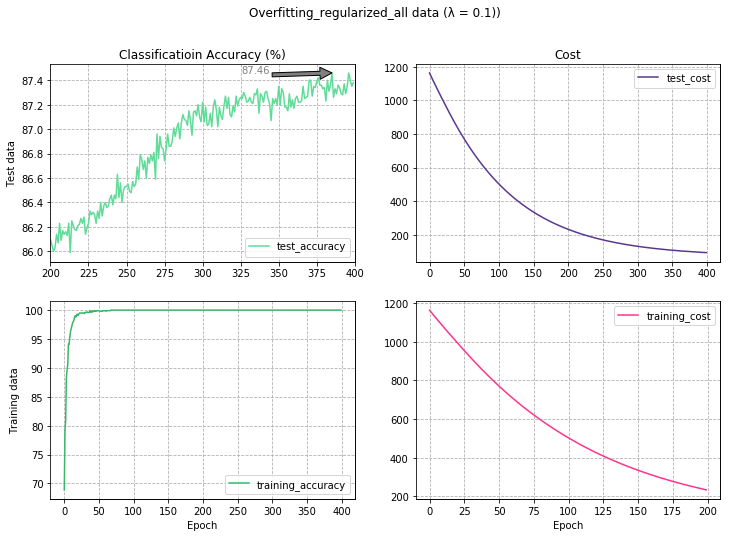

In [45]:
# for plots run this:
make_plots()

Epoch 0 training complete
Cost on training data: 1163.4356519330345
Accuracy on training data: 689 / 1000
Cost on evaluation data: 1163.594113769782
Accuracy on evaluation data: 5858 / 10000
Epoch 1 training complete
Cost on training data: 1154.1380358465867
Accuracy on training data: 792 / 1000
Cost on evaluation data: 1154.3777500934
Accuracy on evaluation data: 6717 / 10000
Epoch 2 training complete
Cost on training data: 1145.0923154843485
Accuracy on training data: 808 / 1000
Cost on evaluation data: 1145.2826624012716
Accuracy on evaluation data: 6926 / 10000
Epoch 3 training complete
Cost on training data: 1136.20653239804
Accuracy on training data: 883 / 1000
Cost on evaluation data: 1136.4531980956835
Accuracy on evaluation data: 7386 / 10000
Epoch 4 training complete
Cost on training data: 1127.6388804803055
Accuracy on training data: 896 / 1000
Cost on evaluation data: 1127.9759575748126
Accuracy on evaluation data: 7516 / 10000
Epoch 5 training complete
Cost on training dat

Epoch 43 training complete
Cost on training data: 818.2407232290357
Accuracy on training data: 999 / 1000
Cost on evaluation data: 818.7504979398963
Accuracy on evaluation data: 8242 / 10000
Epoch 44 training complete
Cost on training data: 811.2204173556726
Accuracy on training data: 998 / 1000
Cost on evaluation data: 811.7336270699683
Accuracy on evaluation data: 8239 / 10000
Epoch 45 training complete
Cost on training data: 804.254918161802
Accuracy on training data: 999 / 1000
Cost on evaluation data: 804.7708491400474
Accuracy on evaluation data: 8250 / 10000
Epoch 46 training complete
Cost on training data: 797.3547183946351
Accuracy on training data: 998 / 1000
Cost on evaluation data: 797.8461817795181
Accuracy on evaluation data: 8266 / 10000
Epoch 47 training complete
Cost on training data: 790.4958580395745
Accuracy on training data: 999 / 1000
Cost on evaluation data: 791.0025955320751
Accuracy on evaluation data: 8248 / 10000
Epoch 48 training complete
Cost on training da

Epoch 86 training complete
Cost on training data: 565.2607194150767
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 565.7946278205898
Accuracy on evaluation data: 8369 / 10000
Epoch 87 training complete
Cost on training data: 560.468668665669
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 561.0112152249286
Accuracy on evaluation data: 8393 / 10000
Epoch 88 training complete
Cost on training data: 555.7151374447366
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 556.2604727440096
Accuracy on evaluation data: 8392 / 10000
Epoch 89 training complete
Cost on training data: 551.0161750858731
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 551.5532046994527
Accuracy on evaluation data: 8396 / 10000
Epoch 90 training complete
Cost on training data: 546.3542403968393
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 546.9032015901273
Accuracy on evaluation data: 8394 / 10000
Epoch 91 training complete
Cost on traini

Cost on evaluation data: 399.01434477599076
Accuracy on evaluation data: 8464 / 10000
Epoch 129 training complete
Cost on training data: 395.27718818566393
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 395.8038854271191
Accuracy on evaluation data: 8465 / 10000
Epoch 130 training complete
Cost on training data: 392.10407042709755
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 392.62937729917945
Accuracy on evaluation data: 8474 / 10000
Epoch 131 training complete
Cost on training data: 388.95404173789234
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 389.4832033828649
Accuracy on evaluation data: 8473 / 10000
Epoch 132 training complete
Cost on training data: 385.8473366503123
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 386.36869396648626
Accuracy on evaluation data: 8478 / 10000
Epoch 133 training complete
Cost on training data: 382.7645254007522
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 383.

Epoch 171 training complete
Cost on training data: 285.4205974425975
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 285.92320457603364
Accuracy on evaluation data: 8571 / 10000
Epoch 172 training complete
Cost on training data: 283.3191572030103
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 283.816738418551
Accuracy on evaluation data: 8569 / 10000
Epoch 173 training complete
Cost on training data: 281.23076206794275
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 281.7406259095798
Accuracy on evaluation data: 8563 / 10000
Epoch 174 training complete
Cost on training data: 279.1771754969273
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 279.6708865000586
Accuracy on evaluation data: 8563 / 10000
Epoch 175 training complete
Cost on training data: 277.1353591979191
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 277.6359495058817
Accuracy on evaluation data: 8566 / 10000
Epoch 176 training complete
Cost o

Cost on evaluation data: 213.19897534896478
Accuracy on evaluation data: 8599 / 10000
Epoch 214 training complete
Cost on training data: 211.32047933831208
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 211.8020194401348
Accuracy on evaluation data: 8625 / 10000
Epoch 215 training complete
Cost on training data: 209.94238664486318
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 210.43007271227933
Accuracy on evaluation data: 8621 / 10000
Epoch 216 training complete
Cost on training data: 208.5807008509024
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 209.05954574258342
Accuracy on evaluation data: 8618 / 10000
Epoch 217 training complete
Cost on training data: 207.231131181728
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 207.70794098757946
Accuracy on evaluation data: 8617 / 10000
Epoch 218 training complete
Cost on training data: 205.89651549806086
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 206.

Accuracy on evaluation data: 8653 / 10000
Epoch 256 training complete
Cost on training data: 163.76955282071074
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 164.22882948137502
Accuracy on evaluation data: 8655 / 10000
Epoch 257 training complete
Cost on training data: 162.86276496101405
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 163.32897597028162
Accuracy on evaluation data: 8669 / 10000
Epoch 258 training complete
Cost on training data: 161.96888742075566
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 162.42628643351668
Accuracy on evaluation data: 8659 / 10000
Epoch 259 training complete
Cost on training data: 161.0763418968093
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 161.53383039407512
Accuracy on evaluation data: 8679 / 10000
Epoch 260 training complete
Cost on training data: 160.18929316428367
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 160.6556303784708
Accuracy on evaluation data

Epoch 298 training complete
Cost on training data: 132.38776669860476
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 132.82841929314728
Accuracy on evaluation data: 8710 / 10000
Epoch 299 training complete
Cost on training data: 131.78233272867445
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 132.23199788255775
Accuracy on evaluation data: 8706 / 10000
Epoch 300 training complete
Cost on training data: 131.1903595103315
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 131.64698553454974
Accuracy on evaluation data: 8722 / 10000
Epoch 301 training complete
Cost on training data: 130.6032375533862
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 131.0635029672034
Accuracy on evaluation data: 8706 / 10000
Epoch 302 training complete
Cost on training data: 130.02607863404458
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 130.47562407757462
Accuracy on evaluation data: 8718 / 10000
Epoch 303 training complete


Cost on evaluation data: 112.11478321250584
Accuracy on evaluation data: 8722 / 10000
Epoch 341 training complete
Cost on training data: 111.27373195161627
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 111.72724783449048
Accuracy on evaluation data: 8730 / 10000
Epoch 342 training complete
Cost on training data: 110.87734875473733
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 111.32127702962329
Accuracy on evaluation data: 8731 / 10000
Epoch 343 training complete
Cost on training data: 110.48950244642113
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 110.9320410992187
Accuracy on evaluation data: 8725 / 10000
Epoch 344 training complete
Cost on training data: 110.09923954142143
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 110.54821449960487
Accuracy on evaluation data: 8721 / 10000
Epoch 345 training complete
Cost on training data: 109.71813338260976
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 1

Accuracy on evaluation data: 8740 / 10000
Epoch 383 training complete
Cost on training data: 97.65314135916529
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 98.10299028466477
Accuracy on evaluation data: 8731 / 10000
Epoch 384 training complete
Cost on training data: 97.39418309901815
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 97.82676028675495
Accuracy on evaluation data: 8736 / 10000
Epoch 385 training complete
Cost on training data: 97.13722671526286
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 97.57955011169754
Accuracy on evaluation data: 8746 / 10000
Epoch 386 training complete
Cost on training data: 96.8737142122709
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 97.3228030760835
Accuracy on evaluation data: 8726 / 10000
Epoch 387 training complete
Cost on training data: 96.62089433643983
Accuracy on training data: 1000 / 1000
Cost on evaluation data: 97.06484288073955
Accuracy on evaluation data: 8733 / 1

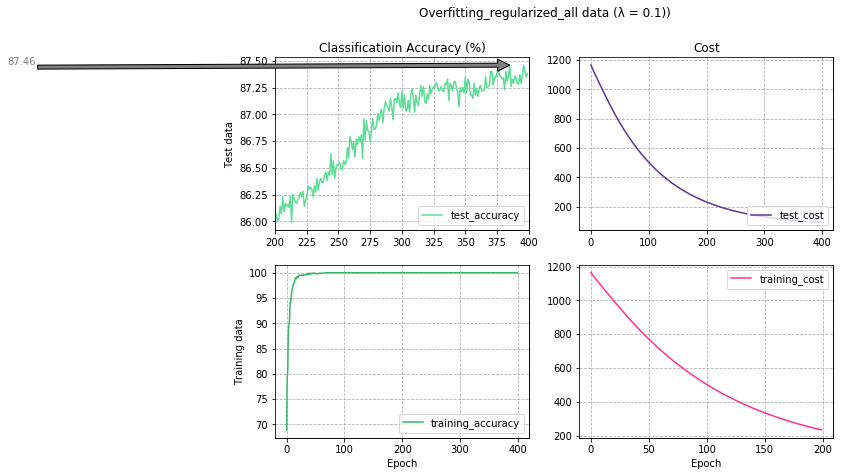

2153.612855911255


In [30]:
# to run do this:
if __name__ == "__main__":
    main() 